In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from unidecode import unidecode
import plotly.express as px

In [357]:
df = pd.read_csv("AtropellosGS2015.csv")

## Se procede a revisar si hay valores nulos gracias al comando .info()

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           1841 non-null   float64
 1   Y           1841 non-null   float64
 2   Ubicacion   1841 non-null   object 
 3   Fallecidos  1841 non-null   int64  
 4   Graves      1841 non-null   int64  
 5   MenosGrave  1841 non-null   int64  
 6   Leve        1841 non-null   int64  
 7   Accidentes  1841 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 115.2+ KB


Se esta ante la precencia de un conjunto de datos que no tiene valores nulos, lo que de forma inicial es un muy buen indicio para poder obtener estadisticas.

In [359]:
df.describe()

,X,Y,Fallecidos,Graves,MenosGrave,Leve,Accidentes
count,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000
mean,-70.642630,-33.473420,0.057577,0.295492,0.098316,0.828897,1.190114
std,0.066754,0.067868,0.248798,0.529177,0.310334,0.768646,0.553379
min,-70.798508,-33.631695,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-70.691135,-33.522422,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-70.640550,-33.454299,0.000000,0.000000,0.000000,1.000000,1.000000
75%,-70.586695,-33.425596,0.000000,1.000000,0.000000,1.000000,1.000000
max,-70.493987,-33.325531,3.000000,4.000000,2.000000,7.000000,8.000000


Gracias a .describe() se logra ver que en ciertos lugares hay una insidencia de hasta 7 accidentes leves registrados, en otros encontramos hata 4 accidentes graves y en los categorizados como menos graves unicamente 2 insidencias, lo que indica es que en el conjunto de datos existe una mayor incidencia cuando son accodentes graves o leves.

In [360]:
indices_duplicados = df[df['Ubicacion'].duplicated(keep=False)].index

print(f'La cantidad de duplicados en la columna Ubicacion son: {len(indices_duplicados)}')
for i in range(len(indices_duplicados)):
    print(f'Indice: {indices_duplicados[i]}')

La cantidad de duplicados en la columna Ubicacion son: 4
Indice: 21
Indice: 25
Indice: 1439
Indice: 1443


Analisando valores duplicados en la variable 'Ubicacion' se logra apreciar que como minimo hay dos filas que tienen la misma ubicación, se procede a revisar cuales son y si el restode variables tambien se repite.

In [361]:
duplicados_21 = df[df['Ubicacion'] == df.loc[21, 'Ubicacion']]
print(duplicados_21)

            X          Y                               Ubicacion  Fallecidos  \
21 -70.779277 -33.508568  CAMINO A RINCONADA & 3 PONIENTE, MAIPU           0   
25 -70.778004 -33.508929  CAMINO A RINCONADA & 3 PONIENTE, MAIPU           0   

    Graves  MenosGrave  Leve  Accidentes  
21       1           0     0           1  
25       2           1     2           3  


In [362]:
duplicados_1439 = df[df['Ubicacion'] == df.loc[1439, 'Ubicacion']]
print(duplicados_1439)

              X          Y                                       Ubicacion  \
1439 -70.581991 -33.579314  CONCHA Y TORO & GABRIELA PONIENTE, PUENTE ALTO   
1443 -70.581722 -33.579318  CONCHA Y TORO & GABRIELA PONIENTE, PUENTE ALTO   

      Fallecidos  Graves  MenosGrave  Leve  Accidentes  
1439           0       0           0     1           1  
1443           0       1           0     2           3  


Debido a que la información que esta mostrando en cada fila es una Ubicación con el resumen de sus accidentes, no es valido que exista este tipo de duplicidad por lo que se eliminara una de estas columnas diplicadas sumando en la que se dejara en el df los campos Fallecidos, Graves, MenosGrace, Leve y Accidentes.

In [363]:
cols_to_sum = ['Fallecidos', 'Graves', 'MenosGrave', 'Leve', 'Accidentes']

df_aggregated = df.groupby('Ubicacion')[cols_to_sum].sum().reset_index()

df_clean = df.drop(columns=cols_to_sum).drop_duplicates('Ubicacion').merge(df_aggregated, on='Ubicacion')


In [364]:
df_clean

,X,Y,Ubicacion,Fallecidos,Graves,MenosGrave,Leve,Accidentes
0,-70.798508,-33.364435,"CAMINO RENCA LAMPA & CAMINO AGUAS CLARAS, PUDA...",0,1,0,0,1
1,-70.797142,-33.354941,"CAMINO LO ECHEVERS & CAMINO PRIVADO, QUILICURA",0,1,0,0,1
2,-70.797944,-33.511716,"EL CONQUISTADOR & SENADORA MARIA DE LA CRUZ, M...",0,1,0,1,1
3,-70.797199,-33.513151,"EL CONQUISTADOR & PINTOR HORACIO GARCIA, MAIPU",0,1,0,0,1
4,-70.797021,-33.518601,"1370 EL CONQUISTADOR, MAIPU",0,1,0,0,1
...,...,...,...,...,...,...,...,...
1834,-70.505432,-33.361094,"LO BARNECHEA & GOMEZ, LO BARNECHEA",0,0,0,1,1
1835,-70.502373,-33.355034,"CAMINO CIRCUNVALACION NORTE & EL GAVILAN, LO B...",0,1,0,0,1
1836,-70.499909,-33.364876,"14196 QUINCHAMALI, LO BARNECHEA",0,0,0,1,1
1837,-70.499393,-33.353600,"CAMINO CIRCUNVALACION NORTE & 4 NORTE, LO BARN...",0,0,0,1,1


In [365]:
df_clean['Comuna'] = df_clean['Ubicacion'].str.split(',').str[1]
df_clean['Comuna'] = df_clean['Comuna'].str.strip()
df_clean

,X,Y,Ubicacion,Fallecidos,Graves,MenosGrave,Leve,Accidentes,Comuna
0,-70.798508,-33.364435,"CAMINO RENCA LAMPA & CAMINO AGUAS CLARAS, PUDA...",0,1,0,0,1,PUDAHUEL
1,-70.797142,-33.354941,"CAMINO LO ECHEVERS & CAMINO PRIVADO, QUILICURA",0,1,0,0,1,QUILICURA
2,-70.797944,-33.511716,"EL CONQUISTADOR & SENADORA MARIA DE LA CRUZ, M...",0,1,0,1,1,MAIPU
3,-70.797199,-33.513151,"EL CONQUISTADOR & PINTOR HORACIO GARCIA, MAIPU",0,1,0,0,1,MAIPU
4,-70.797021,-33.518601,"1370 EL CONQUISTADOR, MAIPU",0,1,0,0,1,MAIPU
...,...,...,...,...,...,...,...,...,...
1834,-70.505432,-33.361094,"LO BARNECHEA & GOMEZ, LO BARNECHEA",0,0,0,1,1,LO BARNECHEA
1835,-70.502373,-33.355034,"CAMINO CIRCUNVALACION NORTE & EL GAVILAN, LO B...",0,1,0,0,1,LO BARNECHEA
1836,-70.499909,-33.364876,"14196 QUINCHAMALI, LO BARNECHEA",0,0,0,1,1,LO BARNECHEA
1837,-70.499393,-33.353600,"CAMINO CIRCUNVALACION NORTE & 4 NORTE, LO BARN...",0,0,0,1,1,LO BARNECHEA


## Análisis considerando la frecuencia en que aparecen las comunas en el conjunto de datos.

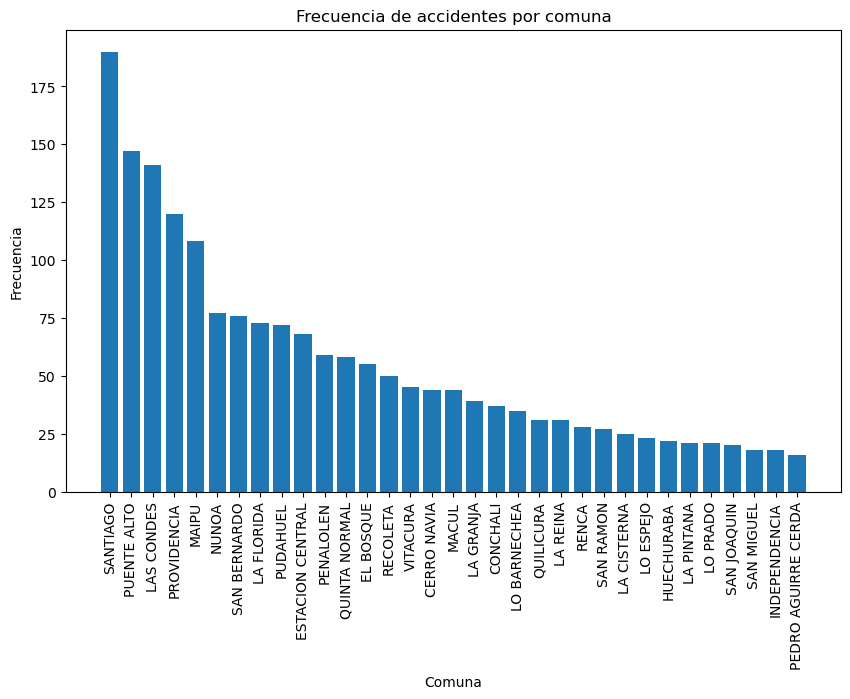

In [366]:
tabla_frecuencias = df_clean['Comuna'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(tabla_frecuencias.index, tabla_frecuencias.values)
plt.xticks(rotation=90)
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de accidentes por comuna')
plt.show()

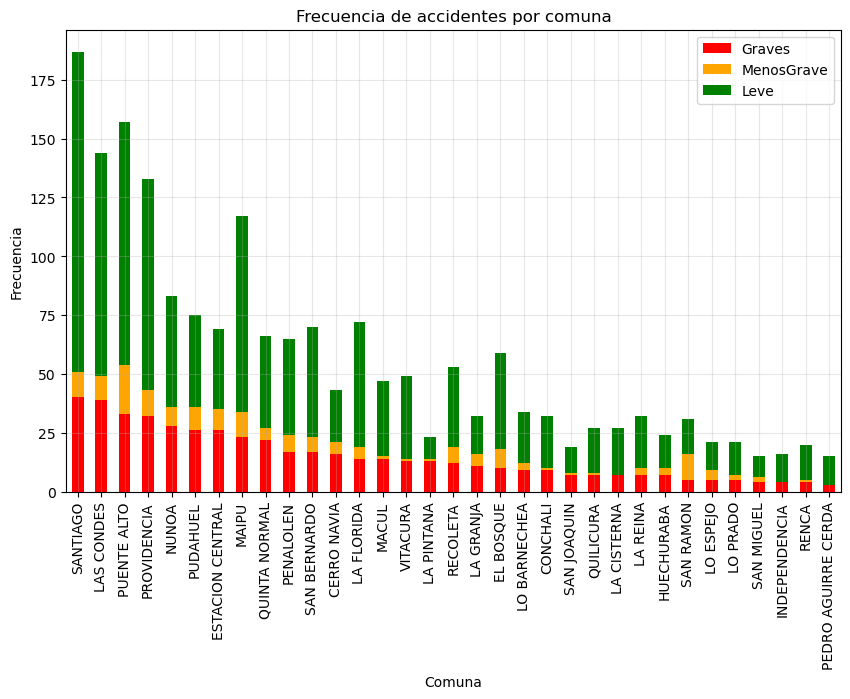

In [367]:
df_resumen = pd.DataFrame()

df_resumen['Graves'] = df_clean[df_clean['Graves'] > 0]['Comuna'].value_counts()
df_resumen['MenosGrave'] = df_clean[df_clean['MenosGrave'] > 0]['Comuna'].value_counts()
df_resumen['Leve'] = df_clean[df_clean['Leve'] > 0]['Comuna'].value_counts()

df_resumen = df_resumen.fillna(0)

df_resumen.plot(kind='bar', stacked=True, color=["red", "orange", "green"], figsize=(10,6))

plt.xticks(rotation=90)
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de accidentes por comuna')
plt.grid(alpha=0.3)
plt.show()


In [368]:
gdf = gpd.read_file('https://raw.githubusercontent.com/jlhonora/geo/master/region_metropolitana_de_santiago/all.geojson')

In [369]:
gdf.head()

,CIR_SENA,COD_COMUNA,DIS_ELEC,NOM_COM,NOM_PROV,NOM_REG,SHAPE_Area,SHAPE_LENG,SHAPE_Le_1,geometry
0,7,1350,31,María Pinto,Melipilla,Región Metropolitana de Santiago,3.945066e+08,109727.643980,109727.644650,"POLYGON ((-71.26654 -33.41009, -71.26572 -33.4..."
1,7,1350,31,San Pedro,Melipilla,Región Metropolitana de Santiago,7.938374e+08,162648.311900,162648.311140,"POLYGON ((-71.53863 -33.76415, -71.53812 -33.7..."
2,7,1310,19,Independencia,Santiago,Región Metropolitana de Santiago,7.514746e+06,11488.695747,11718.687086,"POLYGON ((-70.65730 -33.40478, -70.65729 -33.4..."
3,8,1311,26,La Florida,Santiago,Región Metropolitana de Santiago,7.103733e+07,49696.426792,49621.402174,"POLYGON ((-70.43946 -33.49206, -70.43825 -33.4..."
4,8,1311,23,Lo Barnechea,Santiago,Región Metropolitana de Santiago,1.024735e+09,149539.074262,149865.511039,"POLYGON ((-70.47723 -33.36950, -70.47593 -33.3..."


In [370]:
comunas = df_clean['Comuna'].unique()
comunas

array(['PUDAHUEL', 'QUILICURA', 'MAIPU', 'CERRO NAVIA', 'RENCA',
       'LO PRADO', 'ESTACION CENTRAL', 'SAN BERNARDO', 'QUINTA NORMAL',
       'LO ESPEJO', 'EL BOSQUE', 'CONCHALI', 'SANTIAGO', 'HUECHURABA',
       'PEDRO AGUIRRE CERDA', 'LA CISTERNA', 'INDEPENDENCIA',
       'SAN MIGUEL', 'LA PINTANA', 'RECOLETA', 'SAN RAMON', 'SAN JOAQUIN',
       'PROVIDENCIA', 'LA GRANJA', 'NUNOA', 'PUENTE ALTO', 'MACUL',
       'LA FLORIDA', 'LAS CONDES', 'VITACURA', 'PENALOLEN', 'LA REINA',
       'LO BARNECHEA'], dtype=object)

In [371]:
unicos_gfg = gdf['NOM_COM'].unique()
unicos_gfg

array(['María Pinto', 'San Pedro', 'Independencia', 'La Florida',
       'Lo Barnechea', 'Lo Espejo', 'Lo Prado', 'Pedro Aguirre Cerda',
       'Pudahuel', 'San Joaquín', 'San Ramón', 'El Monte',
       'Isla de Maipo', 'Talagante', 'Colina', 'Lampa', 'Tiltil',
       'Pirque', 'Puente Alto', 'San José de Maipo', 'Buin', 'Paine',
       'San Bernardo', 'Alhué', 'Curacaví', 'Calera de Tango',
       'Melipilla', 'Cerrillos', 'Cerro Navia', 'Conchalí', 'El Bosque',
       'Peñalolén', 'Providencia', 'Quilicura', 'Vitacura',
       'Padre Hurtado', 'Quinta Normal', 'Recoleta', 'Renca',
       'San Miguel', 'Santiago', 'Huechuraba', 'La Cisterna', 'La Granja',
       'La Pintana', 'La Reina', 'Las Condes', 'Macul', 'Maipú', 'Ñuñoa',
       'Peñaflor', 'Estación Central'], dtype=object)

In [372]:
gdf = gpd.read_file('https://raw.githubusercontent.com/jlhonora/geo/master/region_metropolitana_de_santiago/all.geojson')
comunas = gdf['NOM_COM'].unique()

comunas_dict = {unidecode(comuna).upper(): comuna for comuna in comunas}

In [373]:
comunas_dict

{'MARIA PINTO': 'María Pinto',
 'SAN PEDRO': 'San Pedro',
 'INDEPENDENCIA': 'Independencia',
 'LA FLORIDA': 'La Florida',
 'LO BARNECHEA': 'Lo Barnechea',
 'LO ESPEJO': 'Lo Espejo',
 'LO PRADO': 'Lo Prado',
 'PEDRO AGUIRRE CERDA': 'Pedro Aguirre Cerda',
 'PUDAHUEL': 'Pudahuel',
 'SAN JOAQUIN': 'San Joaquín',
 'SAN RAMON': 'San Ramón',
 'EL MONTE': 'El Monte',
 'ISLA DE MAIPO': 'Isla de Maipo',
 'TALAGANTE': 'Talagante',
 'COLINA': 'Colina',
 'LAMPA': 'Lampa',
 'TILTIL': 'Tiltil',
 'PIRQUE': 'Pirque',
 'PUENTE ALTO': 'Puente Alto',
 'SAN JOSE DE MAIPO': 'San José de Maipo',
 'BUIN': 'Buin',
 'PAINE': 'Paine',
 'SAN BERNARDO': 'San Bernardo',
 'ALHUE': 'Alhué',
 'CURACAVI': 'Curacaví',
 'CALERA DE TANGO': 'Calera de Tango',
 'MELIPILLA': 'Melipilla',
 'CERRILLOS': 'Cerrillos',
 'CERRO NAVIA': 'Cerro Navia',
 'CONCHALI': 'Conchalí',
 'EL BOSQUE': 'El Bosque',
 'PENALOLEN': 'Peñalolén',
 'PROVIDENCIA': 'Providencia',
 'QUILICURA': 'Quilicura',
 'VITACURA': 'Vitacura',
 'PADRE HURTADO': 'Pa

In [374]:
df_clean['Comuna'] = df_clean['Comuna'].map(comunas_dict)

In [375]:
df_clean

,X,Y,Ubicacion,Fallecidos,Graves,MenosGrave,Leve,Accidentes,Comuna
0,-70.798508,-33.364435,"CAMINO RENCA LAMPA & CAMINO AGUAS CLARAS, PUDA...",0,1,0,0,1,Pudahuel
1,-70.797142,-33.354941,"CAMINO LO ECHEVERS & CAMINO PRIVADO, QUILICURA",0,1,0,0,1,Quilicura
2,-70.797944,-33.511716,"EL CONQUISTADOR & SENADORA MARIA DE LA CRUZ, M...",0,1,0,1,1,Maipú
3,-70.797199,-33.513151,"EL CONQUISTADOR & PINTOR HORACIO GARCIA, MAIPU",0,1,0,0,1,Maipú
4,-70.797021,-33.518601,"1370 EL CONQUISTADOR, MAIPU",0,1,0,0,1,Maipú
...,...,...,...,...,...,...,...,...,...
1834,-70.505432,-33.361094,"LO BARNECHEA & GOMEZ, LO BARNECHEA",0,0,0,1,1,Lo Barnechea
1835,-70.502373,-33.355034,"CAMINO CIRCUNVALACION NORTE & EL GAVILAN, LO B...",0,1,0,0,1,Lo Barnechea
1836,-70.499909,-33.364876,"14196 QUINCHAMALI, LO BARNECHEA",0,0,0,1,1,Lo Barnechea
1837,-70.499393,-33.353600,"CAMINO CIRCUNVALACION NORTE & 4 NORTE, LO BARN...",0,0,0,1,1,Lo Barnechea


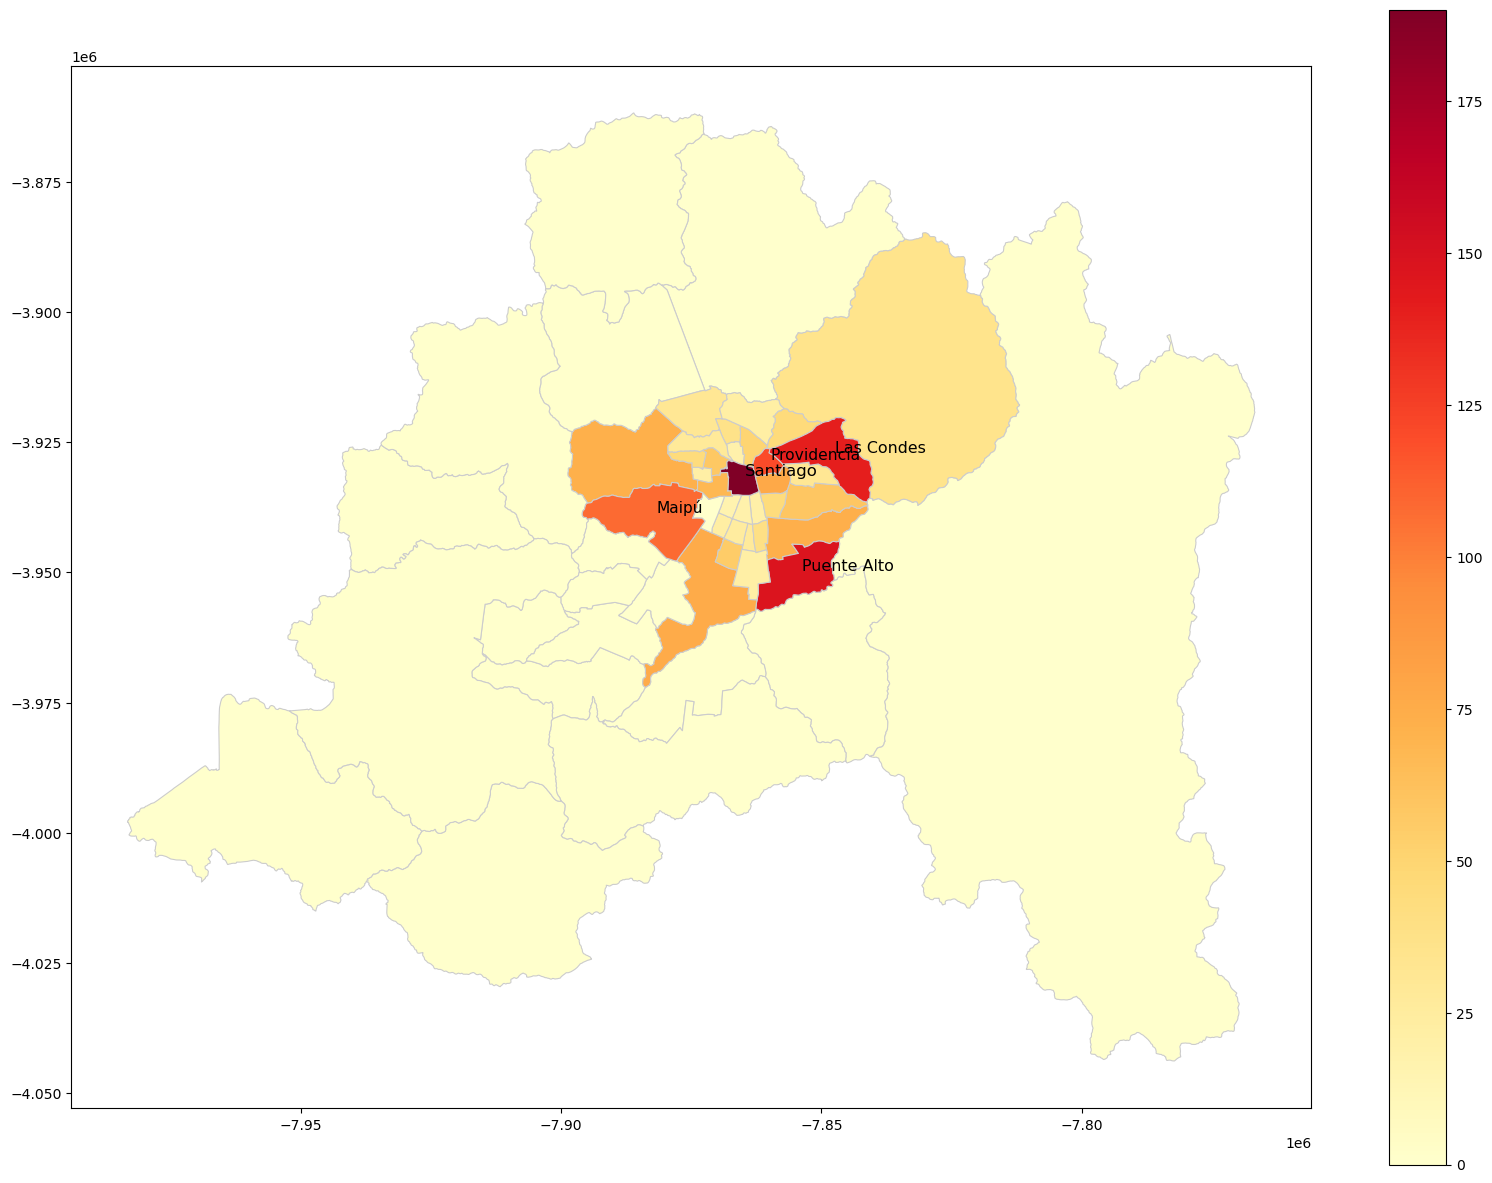

In [381]:
gdf = gpd.read_file('https://raw.githubusercontent.com/jlhonora/geo/master/region_metropolitana_de_santiago/all.geojson')

store_counts = df_clean['Comuna'].value_counts()
df_counts = pd.DataFrame({'Comuna': store_counts.index, 'customer_count': store_counts.values})

all_comunas = gdf['NOM_COM'].unique()
df_counts = df_counts.set_index('Comuna').reindex(all_comunas)

df_counts = df_counts.fillna(0)

gdf = gdf.set_index('NOM_COM').join(df_counts)

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

gdf = gdf.to_crs("EPSG:3395") # Proyectar a Mercator antes de calcular los centroides
gdf.plot(column='customer_count', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

def size_mapping(count):
    return 10 + count * 0.01

for x, y, label, value in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf.index, gdf.customer_count):
    if value > 80:
        ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points", fontsize=size_mapping(value))

plt.show()


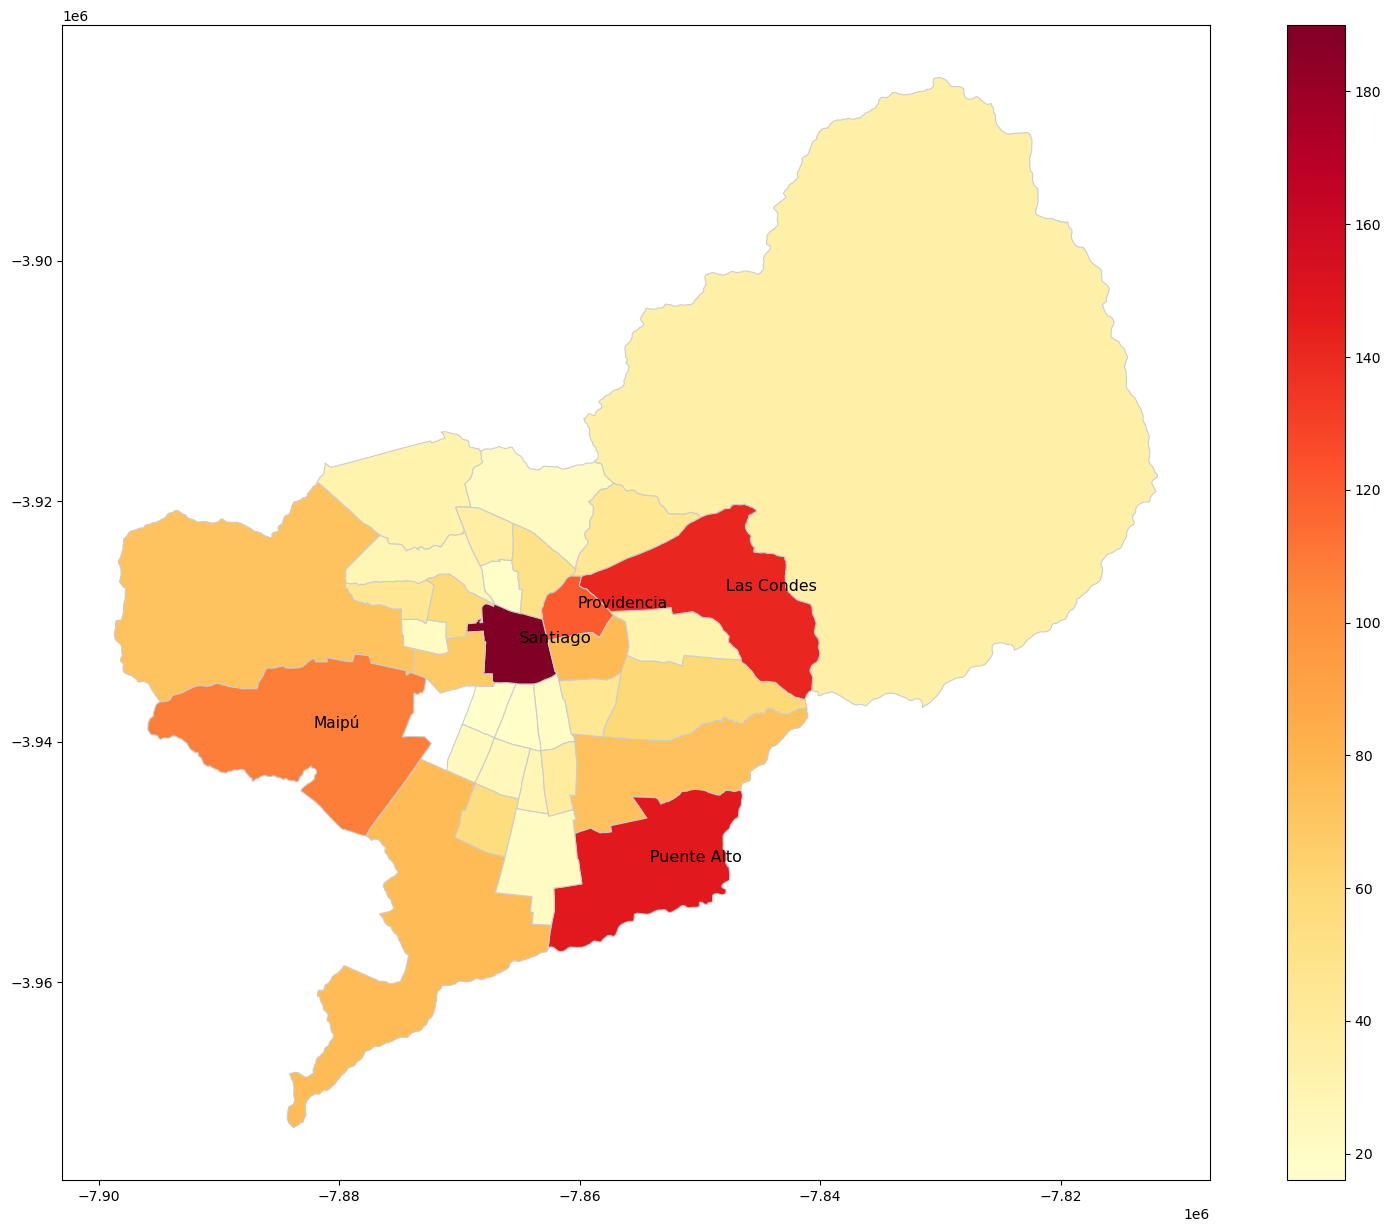

In [382]:
gdf = gpd.read_file('https://raw.githubusercontent.com/jlhonora/geo/master/region_metropolitana_de_santiago/all.geojson')

store_counts = df_clean['Comuna'].value_counts()
df_counts = pd.DataFrame({'Comuna': store_counts.index, 'customer_count': store_counts.values})

all_comunas = gdf['NOM_COM'].unique()
df_counts = df_counts.set_index('Comuna').reindex(all_comunas)

gdf = gdf.set_index('NOM_COM').join(df_counts)

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

gdf = gdf.to_crs("EPSG:3395") # Proyectar a Mercator antes de calcular los centroides
gdf.plot(column='customer_count', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

def size_mapping(count):
    return 10 + count * 0.01

for x, y, label, value in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf.index, gdf.customer_count):
    if value > 80:
        ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points", fontsize=size_mapping(value))

plt.show()